In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
sys.path.append('..')
from telescope_simulator import TelescopeSimulator
import utils


In [2]:
img_test = cv2.imread(r'..\tele_datasets\224\20240108150051_8a66f47491e84cc691f6517d5014f3fd.png', 0)
img_test.shape

(224, 224)

In [3]:
cmap_test = Path('cmap_test')
cmap_test.mkdir(exist_ok=True)

In [4]:
# cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
#         ]
# for cmap in cmaps:
#     plt.imshow(img_test, cmap=cmap);
#     plt.savefig(cmap_test / cmap, dpi=300)

In [5]:

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

In [6]:
def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp


In [7]:
hex_list = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']
cmap = get_continuous_cmap(hex_list)

In [8]:
init_size = 224
upper_size = 1024

In [9]:
hex_list2 = ['#21180F', '#48311D', '#AD5E16', '#F8C449', '#F7C756', '#FFF795', '#FFFFFF']
cmap2 = get_continuous_cmap(hex_list2)

In [10]:
rgbs = list(map(list, map(utils.hex_to_rgb, hex_list2)))
# utils.rgb_to_hex(hex)
cm_yellow = LinearSegmentedColormap.from_list('', np.array(rgbs) / 255, 256)

rgbs = list(map(list, map(utils.hex_to_rgb, hex_list)))
# utils.rgb_to_hex(hex)
cm_color = LinearSegmentedColormap.from_list('', np.array(rgbs) / 255, 256)
# colors1 = (cm(np.linspace(0, 1, len(rgbs) * 2)) * 255).astype(np.uint8)
# colors2 = (cm(np.linspace(0, 1, len(rgbs) * 2 - 1)) * 255).astype(np.uint8)

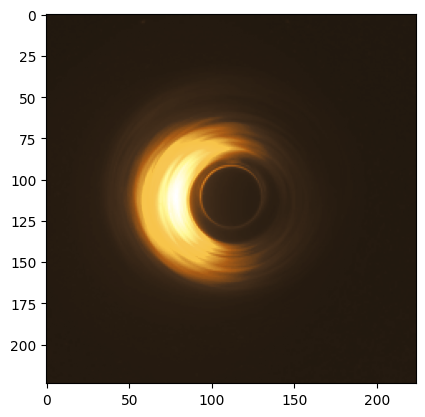

In [11]:
# img_test = cv2.imread(r'papershow/26.png', 0)
img_test = cv2.imread(r"D:\GitHub\DeepShadow\tele_datasets\224\20240108150223_3d88dd459a25418d9bc63d9e29c603ce.png", 0)
img_test = cv2.resize(img_test, (init_size, init_size))
left = (upper_size - img_test.shape[0]) // 2
right = upper_size - img_test.shape[0] - left
top = (upper_size - img_test.shape[1]) // 2
bottom = upper_size - img_test.shape[1] - top
padded_img = np.pad(img_test, ((left, right), (top, bottom)), mode='constant')
plt.imshow(img_test, cmap=cm_yellow);

# plt.imshow(img_test, cmap=cmap);

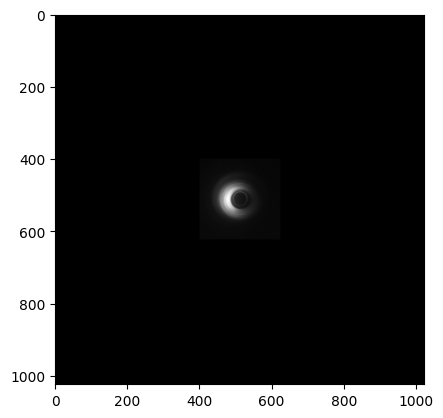

In [12]:
plt.imshow(padded_img, cmap='gray');

In [13]:
angular_pixel_size_input_image = 5e-5
tele_config = dict(
    # physical parameters
    input_image = r"./stars/BHs.png", telescope_diameter_m = 6.5,
    telescope_focal_length_m = 131.4, angular_pixel_size_input_image = angular_pixel_size_input_image,
    wavelength = 100e-9, CCD_pixel_size = angular_pixel_size_input_image * 131.4 / 206265,
    CCD_pixel_count = 1024, show = False,
)
tele_config['input_image'] = padded_img
telescope_simulator = TelescopeSimulator(**tele_config)
show = False
intensity_image = telescope_simulator.get_intensity(padded_img, show=show)
conv_image = telescope_simulator.get_convolved_image(padded_img, intensity_image, show=show)
output_img = telescope_simulator.generate_image(conv_image, show=show)
# output_img = telescope_simulator.generate_image(show=False)

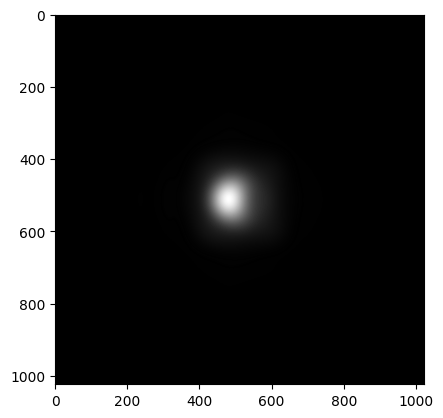

In [14]:
plt.imshow(output_img, cmap='gray');

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
axes[2].set_aspect('equal')
axes[3].set_aspect('equal')
img_dir = Path('papershow')
img_name = '46.png'
img_names = ['4.png', '26.png', '46.png', '52.png']
img_path = img_dir / img_name
inclination = img_path.stem
img_test = cv2.imread(str(img_path), 0)
img_test = cv2.resize(img_test, (init_size, init_size))
if int(inclination) < 10:
    img_test = np.where(img_test<23, 0, img_test)
axes[0].imshow(img_test, cmap=cm_yellow);
axes[0].text(init_size // 2 , int(init_size * 0.88), rf'$\alpha={inclination}\degree$, $\phi=0\degree$', fontfamily='Times New Roman',
             color='white', fontsize=14, ha='center', va='center')
axes[1].imshow(img_test, cmap=cm_color);
axes[1].text(init_size // 2 , int(init_size * 0.88), r'Recolorized image', fontfamily='Times New Roman',
             color='black', fontsize=16, ha='center', va='center')
theta_c = 3.87e-3
angular_pixel_size_input_images = [5e-5, 2e-5]
for index, angular_pixel_size_input_image in enumerate(angular_pixel_size_input_images):
    tele_config = dict(
        input_image = r"./stars/BHs.png", telescope_diameter_m = 6.5,
        telescope_focal_length_m = 131.4, angular_pixel_size_input_image = angular_pixel_size_input_image,
        wavelength = 100e-9, CCD_pixel_size = angular_pixel_size_input_image * 131.4 / 206265,
        CCD_pixel_count = init_size, show = False,
    )
    print('ok')
    left = (upper_size - img_test.shape[0]) // 2
    right = upper_size - img_test.shape[0] - left
    top = (upper_size - img_test.shape[1]) // 2
    bottom = upper_size - img_test.shape[1] - top
    padded_img = np.pad(img_test, ((left, right), (top, bottom)), mode='constant')
    tele_config['input_image'] = padded_img
    telescope_simulator = TelescopeSimulator(**tele_config)
    intensity_image = telescope_simulator.get_intensity(padded_img, show=show)
    conv_image = telescope_simulator.get_convolved_image(padded_img, intensity_image, show=show)
    output_img = telescope_simulator.generate_image(conv_image, show=show)
    # output_img = telescope_simulator.generate_image(show=False)
    angular_size_image = angular_pixel_size_input_image * 224
    # axes[index + 2].imshow(output_img, cmap=cm_color, extent=[0, angular_size_image, 0, angular_size_image], origin='lower');
    factor = angular_pixel_size_input_image * 500 / theta_c
    axes[index + 2].text(init_size // 2 , int(init_size * 0.88), rf"$\theta={factor:.2f}\theta_c$",
                         color='black', fontsize=14, ha='center', va='center')
# fig.tight_layout()
# plt.savefig(f'papershow/{inclination}_out.png', dpi=600)
# plt.savefig(f'papershow/{inclination}_out.pdf')
plt.show()

ok
ok


ValueError: Image size of 42953x73073 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2200x500 with 4 Axes>

In [16]:
5e-5*240

0.012